## 캐글 필사

- https://kaggle-kr.tistory.com/32
***

### 1st level. Titanic: Machine Learning from Disaster
- [타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning](https://kaggle-kr.tistory.com/17?category=868316)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### **해야할 과정들**
1. 데이터셋 확인
2. 탐색적 데이터 분석
3. Feature engineering
4. 모델 만들기
5. 모델 학습 및 에측
6. 모델 평가

***

#### 1. 데이터셋 확인

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- survival: 생존 여부 (0: 죽음, 1: 생존)
- Pclass: 티켓의 클래스
- sex: 성별
- Age: 나이
- sibSp: 함께 탑승한 형제와 배우자의 수
- parch: 함께 탑승한 부모, 아이의 수
- ticket: 티켓 번호
- fare: 탑승료
- cabin: 객실 번호
- embarked: 탑승 항구

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 1.1. Null data check

In [19]:
for col in df_train.columns:
    msg = 'column: {:>11}\t Percent of Nan Value: {:.2f}%'\
            .format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan Value: 0.00%
column:    Survived	 Percent of Nan Value: 0.00%
column:      Pclass	 Percent of Nan Value: 0.00%
column:        Name	 Percent of Nan Value: 0.00%
column:         Sex	 Percent of Nan Value: 0.00%
column:         Age	 Percent of Nan Value: 19.87%
column:       SibSp	 Percent of Nan Value: 0.00%
column:       Parch	 Percent of Nan Value: 0.00%
column:      Ticket	 Percent of Nan Value: 0.00%
column:        Fare	 Percent of Nan Value: 0.00%
column:       Cabin	 Percent of Nan Value: 77.10%
column:    Embarked	 Percent of Nan Value: 0.22%


In [20]:
for col in df_test.columns:
    msg = 'column: {:>11}\t Percent of NaN value: {:.2f}%'\
            .format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:      Pclass	 Percent of NaN value: 0.00%
column:        Name	 Percent of NaN value: 0.00%
column:         Sex	 Percent of NaN value: 0.00%
column:         Age	 Percent of NaN value: 20.57%
column:       SibSp	 Percent of NaN value: 0.00%
column:       Parch	 Percent of NaN value: 0.00%
column:      Ticket	 Percent of NaN value: 0.00%
column:        Fare	 Percent of NaN value: 0.24%
column:       Cabin	 Percent of NaN value: 78.23%
column:    Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

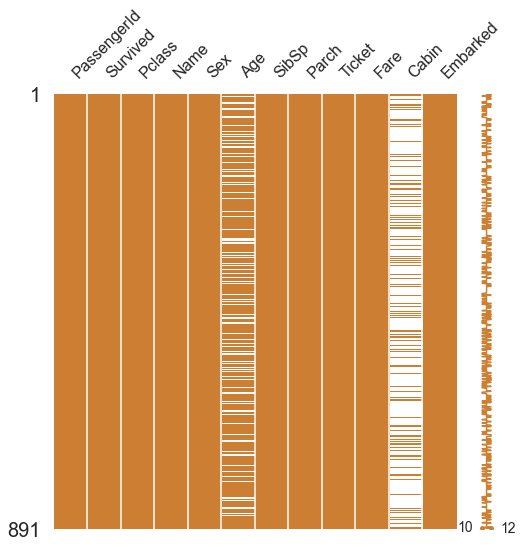

In [21]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

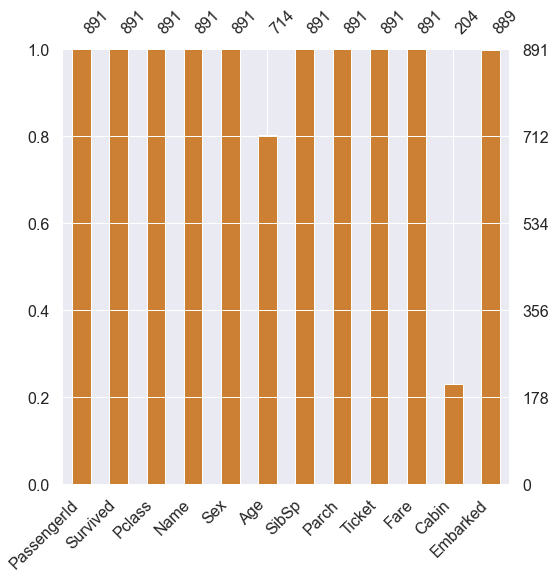

In [23]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

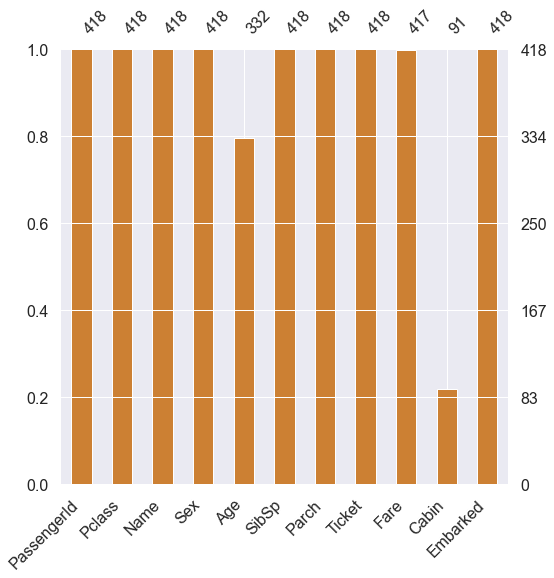

In [24]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

#### 1.2. Target label 확인
- Target label의 분포가 어떻게 되는지 확인할 필요 있음
- 이 분포에 따라 모델 평가 방식이 달라질 수 있음

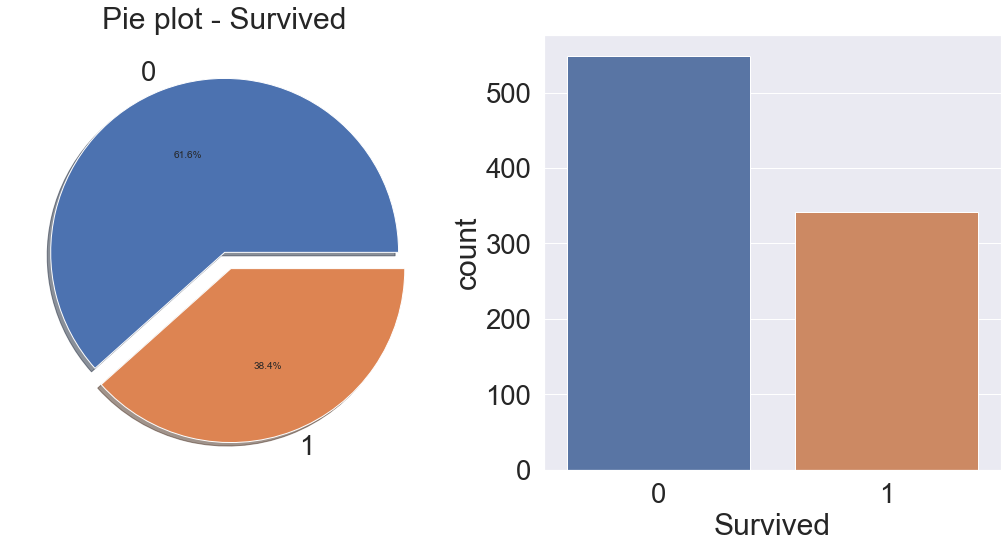

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',
                                             ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])

plt.show()

비교적 0과 1이 균일한 분포

#### 2. Exploratory data analysis
- 적절한 시각화를 위한 데이터 분석 과정
- matplotlib, seaborn, plotly 등 적절히 이용

#### 2.1. Pclass
- Pclass(티켓 클래스)는 카테고리이면서, 순서가 있는 데이터 타입
- 먼저 Pclass에 따른 생존률을 살펴 본다

In [21]:
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


crosstab을 이용하면 이 과정이 좀 더 쉽다.

In [27]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

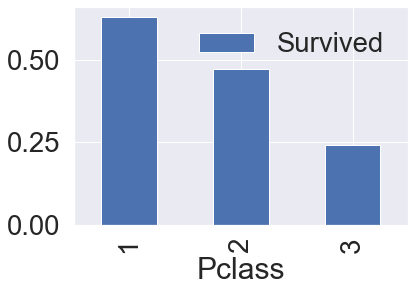

In [30]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass 1이 생존률이 높았고 3은 낮았다